# Prerequisite plots

## Plotting $e^{-x^2}$

Let us plot $e^{-x^2}$ first since it is going to be central to our problem

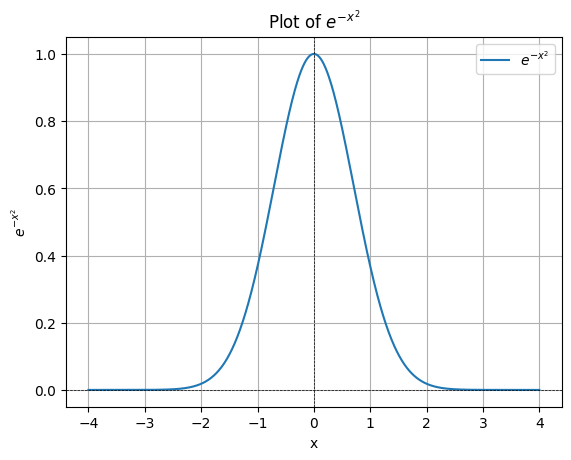

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Data
x = np.linspace(-4, 4, 1000)
y = np.exp(-x**2)

# Plot
plt.plot(x, y,label='$e^{-x^2}$')
plt.title('Plot of $e^{-x^2}$')
plt.xlabel('x')
plt.ylabel('$e^{-x^2}$')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

## Plot $e^{-(x/\sigma)^2}$

This plot will show how the thickness of the plot varies with regards to $\sigma$

$ Thickness \propto 1/\sigma$

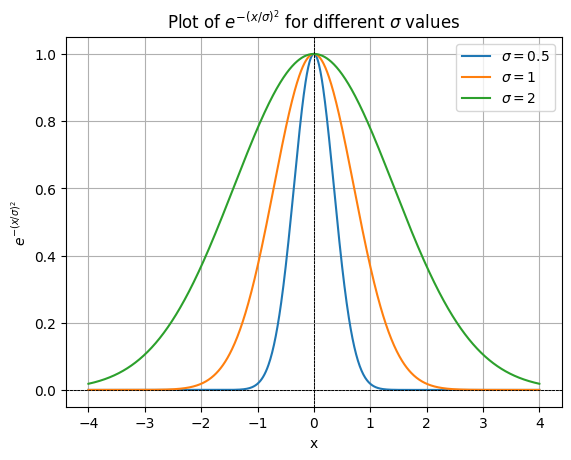

In [7]:
sigma_values = [0.5, 1, 2]
x = np.linspace(-4, 4, 1000)
plt.figure()
for sigma in sigma_values:
    y = np.exp(-(x/sigma)**2)
    plt.plot(x, y, label=f'$\sigma={sigma}$')
    plt.title('Plot of $e^{-(x/\\sigma)^2}$ for different $\\sigma$ values')
    plt.xlabel('x')
    plt.ylabel('$e^{-(x/\\sigma)^2}$')
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
plt.show()


The negative sign makes sure that the thickness blows up for an increase in sigma

# Plot the normal distribution

Now, let us plot the normal distribution as it is the main concept implemented in GMMs

Formula for normal distribution

$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $
 

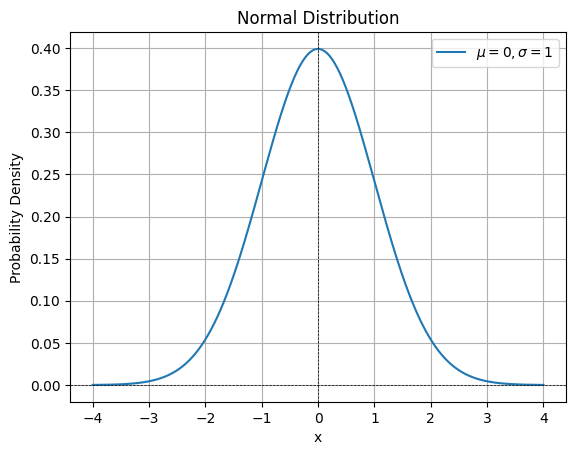

In [4]:
from scipy.stats import norm
# Parameters for the normal distribution
mu = 0      # Mean
sigma = 1   # Standard deviation
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)
# Plot
plt.plot(x, y,label=f'$\mu={mu}, \sigma={sigma}$')
plt.title('Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

In [5]:
pdf_value=norm.pdf(0, mu, sigma)
print(f'The probability density at x=0 for N(0,0) is {pdf_value}')


The probability density at x=0 for N(0,0) is 0.3989422804014327


# Implementing Gaussian Mixture Models

Now that the required prerequisites are implemented, let us dive into Gaussian Mixture Models.


## Overview
A **Gaussian Mixture Model (GMM)** assumes that the data is generated from a mixture of several Gaussian distributions, each representing a cluster.  
Unlike K-Means, GMM uses **soft clustering** — each point belongs to all clusters with certain probabilities.

Mathematically, the probability of a data point xᵢ under a GMM with K components is:

$$p(x_i) = \sum_{k=1}^{K} \pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k)$$

where:  
- πₖ: mixing weight (prior probability of cluster k)  
- μₖ: mean vector of cluster k  
- Σₖ: covariance matrix of cluster k  
- $\sum_{k=1}^{K} \pi_k = 1$

---

## Step 1: Initialization
Start with initial guesses for all parameters:
- Means μₖ
- Covariances Σₖ
- Mixing weights πₖ

These can be chosen randomly or using K-Means clustering.

---

## Step 2: Expectation (E-Step)
Compute **responsibilities** — the probability that each data point xᵢ belongs to cluster k:

$$Pr(Gaussian-Cluster=k|xi) = \frac{\pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k)}{\sum_{k=1}^{K} \pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k)}$$
$$\Pr(\text{Gaussian-Cluster}=k \mid x_i) = \gamma_{ki}$$

where:
- The numerator represents the joint probability that point xᵢ came from component k
- The denominator represents is the overall likelihood of observing the data point $x_i$(Sum of Pr($x_i$|Cluster=k) for all k)
- The denominator ensures all responsibilities for xᵢ sum to 1, as dividing by the denominator normalizes it.

Each row of Pr(Gaussian-Cluster=k|xi) sums to 1:

$$\sum_{k=1}^{K} Pr(Gaussian-Cluster=k|xi) = 1$$
$$\sum_{k=1}^{K} \gamma_{ki} = 1$$

---

## Step 3: Maximization (M-Step)
Update parameters using the new responsibilities.

1. **Effective number of points in each cluster:**
$$N_k = \sum_{i=1}^{N} \gamma_{ki}$$

2. **Updated means:**
$$\mu_k = \frac{1}{N_k} \sum_{i=1}^{N} \gamma_{ki} x_i$$

3. **Updated covariances:**
$$\Sigma_k = \frac{1}{N_k} \sum_{i=1}^{N} \gamma_{ki}(x_i - \mu_k)(x_i - \mu_k)^\top$$

4. **Updated mixing weights:**
$$\pi_k = \frac{N_k}{N}$$

---

## Step 4: Log-Likelihood and Convergence
After each E and M step, compute the **log-likelihood** of the data under the current parameters:

$$\mathcal{L} = \sum_{i=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k) \right)$$

Continue iterating until:

$$|\mathcal{L}_{t+1} - \mathcal{L}_{t}| < \text{tolerance}$$

---

## Step 5: Interpretation
- Points with higher γᵢₖ for a particular k are more likely to belong to that cluster.  
- The ellipses in the final visualization represent the covariance structure of each Gaussian.  
- GMM captures overlapping, elliptical, and probabilistic cluster boundaries — unlike K-Means.

---

## Comparison: GMM vs K-Means

| Feature | GMM | K-Means |
|----------|-----|----------|
| Cluster Shape | Elliptical (via covariance) | Spherical |
| Membership | Soft (probabilistic) | Hard (binary) |
| Objective | Maximize likelihood | Minimize distance |
| Distribution Assumption | Gaussian | None |
| Handles Overlap? | Yes | No |

---

## Key Insights
- The **E-step** assigns probabilities to clusters.  
- The **M-step** re-estimates parameters to maximize the expected likelihood.  
- EM guarantees non-decreasing log-likelihood with each iteration.  
- **K-Means is a special case** of GMM where all covariances are identical and spherical.

---

## Example Intuition
Given incomes (in $k):

$$X = [35, 40, 70, 75, 80]$$

Two clusters roughly around 40 and 75 emerge.  
GMM learns soft assignments such as:

| x | γ₁ (low-income) | γ₂ (high-income) |
|---|------------------|------------------|
| 35 | 0.95 | 0.05 |
| 40 | 0.90 | 0.10 |
| 70 | 0.30 | 0.70 |
| 75 | 0.10 | 0.90 |
| 80 | 0.05 | 0.95 |

---

## Summary
Expectation–Maximization for GMM alternates between:
- Expecting cluster membership (**E-step**)
- Maximizing model parameters (**M-step**)

This process continues until the log-likelihood converges, providing a probabilistic model of the data with flexible, elliptical clusters.

## Implementing Gaussian Mixture Models using a Manual Method

In [1]:
import pandas as pd
mall_customer_df=pd.read_csv('https://raw.githubusercontent.com/AtulAravindDas/ToolsforDS/main/Mall_Customers.csv')
mall_customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
from sklearn.preprocessing import StandardScaler
X = mall_customer_df[['Age', 'Annual Income (k$)']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)



In [4]:
import numpy as np
mat=np.array([[1, 2], [3, 4]])

print(mat)
print("Sum along columns:",np.sum(mat, axis=0))  # Sum along columns
print("Sum along rows:",np.sum(mat, axis=1))  # Sum along rows

[[1 2]
 [3 4]]
Sum along columns: [4 6]
Sum along rows: [3 7]


In [5]:
from scipy.stats import multivariate_normal
def gmm_em_clusters(X,n_components,tol=1e-4):
    weights = np.ones(n_components)/n_components
    print("Initial Weights:", weights)
    #print(np.random.choice(a=X.shape[0], size=n_components, replace=False)) #Run this command to see how np.random.choice works
    means = X[np.random.choice(a=X.shape[0], size=n_components, replace=False)] # Here a=range of values to be considered, size= total number of values to be chosen, replace= whether to choose with replacement or without replacement(true=> Repetition allowed, false=> No repetition) and here we consider 4 of the 200 values to be centres of the clusters
    #print("Initial Means:\n", means)
    variances=np.array([np.eye(X.shape[1])]*n_components) # Initializing variances to identity matrices
    #print("Initial Variances:\n", variances)
    prev_likelihood = 0
    for iteration in range(200):
        # Expectation Step
        prob_x_given_k=np.zeros((X.shape[0],n_components)) 
        for k in range(n_components):
            prob_x_given_k[:,k]=weights[k]*multivariate_normal.pdf(X,means[k],variances[k]) #Calculating the numerator of the expectation equation
        prob_x=np.sum(prob_x_given_k,axis=1) #Calculating the denominator of the expectation equation( will be sum of all the numerator rows)
        prob_k_given_x=prob_x_given_k/prob_x[:,np.newaxis] #Calculating the expectations
        # Maximization Step
        N_k=np.sum(prob_k_given_x,axis=0) #Every column in prob_k_given_x corresponds to a cluster. Summing all the rows in a column gives us N_k for that cluster
        new_weights=N_k/X.shape[0]
        new_means=np.dot(prob_k_given_x.T,X)/N_k[:,np.newaxis]
        new_variances=np.zeros((n_components,X.shape[1],X.shape[1]))
        for k in range(n_components):
            diff=X-new_means[k]
            new_variances[k]=np.dot(prob_k_given_x[:,k]*diff.T,diff)/N_k[k]
        weights=new_weights
        means=new_means
        variances=new_variances
        likelihood=np.sum(np.log(prob_x))
        if abs(likelihood-prev_likelihood)<tol:
            print(f'Converged at iteration {iteration} with likelihood {likelihood}')
            break
        prev_likelihood=likelihood
    cluster_assignments=np.argmax(prob_k_given_x,axis=1) #Of all the expectations of a data point, choose the maximum one and assign the data point to that cluster
    return cluster_assignments,means,variances,weights

labels,means,covs,weights=gmm_em_clusters(X_scaled,4)

Initial Weights: [0.25 0.25 0.25 0.25]
Converged at iteration 137 with likelihood -505.2776025998626


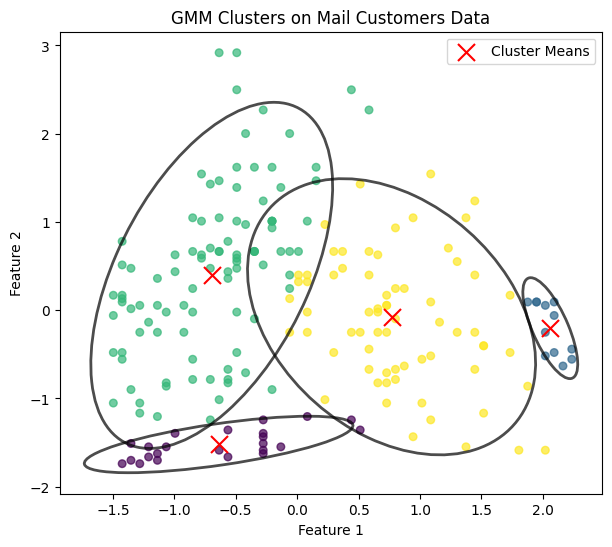

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_gmm_clusters(X, labels, means, covs, title="GMM Clusters", nsig=2.0):
    fig, ax = plt.subplots(figsize=(7,6))

    # Scatter points colored by cluster
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis', alpha=0.7)
    
    # Plot cluster means
    ax.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=150, label='Cluster Means')

    # Draw ellipses (covariances)
    for k, cov in enumerate(covs):
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
        width, height = 2 * nsig * np.sqrt(eigvals)
        ellipse = Ellipse(xy=means[k], width=width, height=height, angle=angle,
                          edgecolor='black', lw=2, facecolor='none', alpha=0.7)
        ax.add_patch(ellipse)

    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()
    plt.show()
plot_gmm_clusters(X_scaled, labels, means, covs, title="GMM Clusters on Mail Customers Data")

# Simplified Version(Required for your assignment)

The above version being used is to explain the intuition behind GMM. The version given below simplifies the entire process

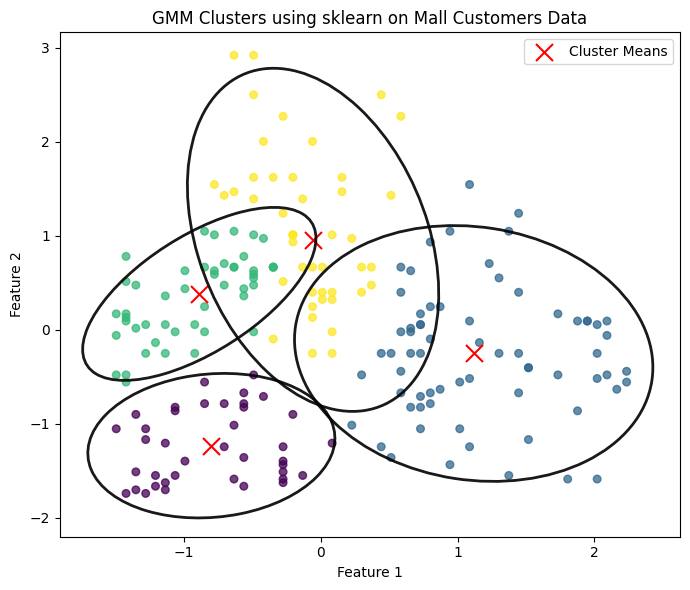

Log-likelihood: -518.1591
AIC: 1082.3183  |  BIC: 1158.1796


GaussianMixture(n_components=4, n_init=5, random_state=42)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

def _cov_to_ellipse_params(cov2):
    """Convert 2x2 covariance to ellipse width, height, and angle (in degrees)."""
    eigvals, eigvecs = np.linalg.eigh(cov2)
    order = np.argsort(eigvals)[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    width  = 2.0 * np.sqrt(eigvals[0])  # 1σ diameter
    height = 2.0 * np.sqrt(eigvals[1])  # 1σ diameter
    angle  = np.degrees(np.arctan2(eigvecs[1,0], eigvecs[0,0]))
    return width, height, angle

def plot_gmm_with_sklearn(X, n_components=4, nsig=2.0, title="GMM Clusters (sklearn)",
                          covariance_type='full', random_state=42):
    """Fit GaussianMixture to 2D data and plot nsig-sigma covariance ellipses."""
    # ---- Fit GMM ----
    gmm = GaussianMixture(
        n_components=n_components,
        covariance_type=covariance_type,
        n_init=5,
        random_state=random_state
    ).fit(X)

    labels = gmm.predict(X)
    means  = gmm.means_
    covs   = gmm.covariances_

    # ---- Plot ----
    fig, ax = plt.subplots(figsize=(7,6))
    sc = ax.scatter(X[:,0], X[:,1], c=labels, s=30, cmap='viridis', alpha=0.75)
    ax.scatter(means[:,0], means[:,1], c='red', marker='x', s=150, label='Cluster Means')

    for k, cov in enumerate(covs):
        w, h, angle = _cov_to_ellipse_params(cov)
        ellipse = Ellipse(
            xy=means[k],
            width=nsig*w,
            height=nsig*h,
            angle=angle,
            edgecolor='black',
            lw=2,
            fill=False,
            alpha=0.9
        )
        ax.add_patch(ellipse)

    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()
    plt.tight_layout()
    plt.show()

    print(f"Log-likelihood: {gmm.score(X) * len(X):.4f}")
    print(f"AIC: {gmm.aic(X):.4f}  |  BIC: {gmm.bic(X):.4f}")

    return gmm  # Return the model for inspection if needed

# ---- Example use ----
plot_gmm_with_sklearn(
    X_scaled,
    n_components=4,
    nsig=2.0,
    title="GMM Clusters using sklearn on Mall Customers Data"
)
